# Worksheet 04

Name:  Ruihang Liu
UID: U49596386

### Topics

- Distance & Similarity

### Distance & Similarity

#### Part 1

a) In the minkowski distance, describe what the parameters p and d are.

$$L_p(x, y) = (\sum_{i=1}^d |x_i - y _i|^p)^\frac{1}{p}$$

p: just a parameter. Data scientists decide which value of p to use. <br>
d: d-dimensional space

When p = 2, the minkowski distance formula == Euclidean Distance <br>
When p = 1, the minkowski distance formula == Manhattan Distance 

b) In your own words describe the difference between the Euclidean distance and the Manhattan distance.

Euclidean distance: the straight line distance <br>
Manhattan distance: how far away is vertical direction + how far away is horizontal direction + whatever the distance is in other dimension's direction

Consider A = (0, 0) and B = (1, 1). When:

- p = 1, d(A, B) = 2
- p = 2, d(A, B) = $\sqrt{2} = 1.41$
- p = 3, d(A, B) = $2^{1/3} = 1.26$
- p = 4, d(A, B) = $2^{1/4} = 1.19$

c) Describe what you think distance would look like when p is very large.

$d(A, B) = 2^{1/p}$

As p goes to infinity, the distance approaches 1.

d) Is the minkowski distance still a distance function when p < 1? Expain why / why not.

No.

To be a distance function, satisfy all 3 requirements below:
1. symmetry
2. 0 only if the points are the same
3. Test triangle and inequality

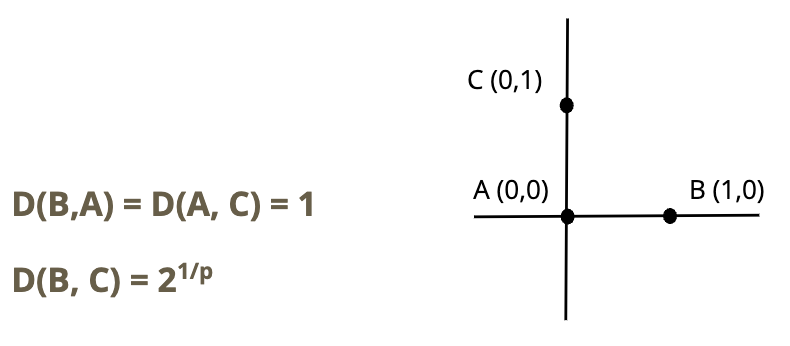

In the example above, D(B,C) will be bigger than 2, which is longer than going from C->A->B.

e) when would you use cosine similarity over the euclidean distance?

* When the **directions** is more important than the **maginitude**. Ex: compares documents similarity. If use E-D, their distnace might be really large if one document is much longer than the other.
* In high dimentional space - distance becomes inflated as d goes up.

Note:

A **similarity** function is a function that takes 2 objects (data points) and returns a **large** value if these objects are **similar**.

$s(x,) = cos(\theta)$ where $\theta$ is the angle between x and y.

* 2 proportional vectors have a cosine similarttity of: 1.
* 2 orthogonal (90 degree) vectors have a similarity of 0.
* 2 opposite vcctors have a similarity of -1.

f) what does the jaccard distance account for that the manhattan distance doesn't?

Ex: 
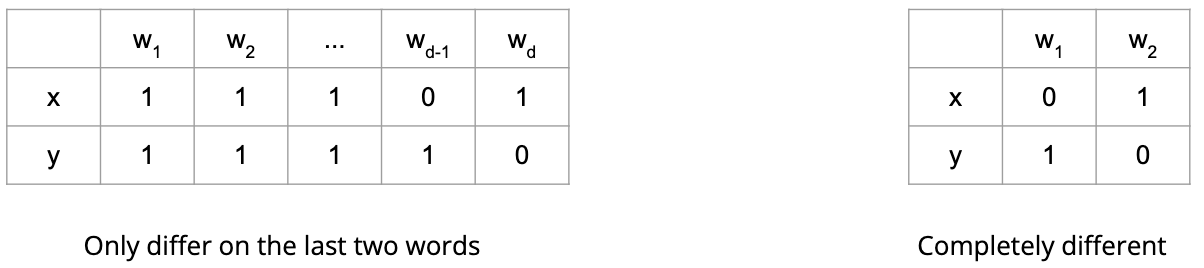

The manhattance distance will be the same (dist = 2) for both documents in the left case and the right case.

Account for the size of the intesection:

$JSim(x,y) = \frac{|x\cap y|}{|x\cup y|} $

$JDist(x,y) = 1- \frac{|x\cap y|}{|x\cup y|} $

So the left case will be larger in case of JDist. While the right will be 1.

#### Part 2

Consider the following two sentences:

In [1]:
s1 = "hello my name is Alice" 
s2 = "hello my name is Bob"

using the union of words from both sentences, we can represent each sentence as a vector. Each element of the vector represents the presence or absence of the word at that index.

In this example, the union of words is ("hello", "my", "name", "is", "Alice", "Bob") so we can represent the above sentences as such:

In [2]:
v1 = [1,    1, 1,   1, 1,    0]
#     hello my name is Alice
v2 = [1,    1, 1,   1, 0, 1]
#     hello my name is    Bob

Programmatically, we can do the following:

In [3]:
corpus = [s1, s2]
all_words = list(set([item for x in corpus for item in x.split()]))
print(all_words)
v1 = [1 if x in s1 else 0 for x in all_words]
print(v1)

['Alice', 'name', 'hello', 'Bob', 'my', 'is']
[1, 1, 1, 0, 1, 1]


Let's add a new sentence to our corpus:

In [4]:
s3 = "hi my name is Claude"
corpus.append(s3)

a) What is the new union of words used to represent s1, s2, and s3?

In [5]:
corpus = [s1, s2, s3]
all_words = list(set([item for x in corpus for item in x.split()]))
print(all_words)

['Alice', 'name', 'hello', 'Bob', 'my', 'is', 'hi', 'Claude']


b) Represent s1, s2, and s3 as vectors as above, using this new set of words.

In [6]:
v1 = [1 if x in s1 else 0 for x in all_words]
print(v1)

v2 = [1 if x in s2 else 0 for x in all_words]
print(v2)

v3 = [1 if x in s3 else 0 for x in all_words]
print(v3)

[1, 1, 1, 0, 1, 1, 0, 0]
[0, 1, 1, 1, 1, 1, 0, 0]
[0, 1, 0, 0, 1, 1, 1, 1]


c) Write a function that computes the manhattan distance between two vectors. Which pair of vectors are the most similar under that distance function?

In [7]:
def minkowski_dist(x, y, p):
    if p < 1:
        raise ValueError("p must be greater than 1.")
    
    if len(x) != len(y):
        raise ValueError("x and y must be in the same dimentional space.")

    res = 0

    for i in range(len(x)):
        res += abs(x[i] - y[i]) ** p

    return res ** (1/p)

def manhattan_dist(x, y):
    return minkowski_dist(x, y, 1)

In [8]:
manhattan_dist(v1, v2)

2.0

d) Create a matrix of all these vectors (row major) and add the following sentences in vector form:

- "hi Alice"
- "hello Claude"
- "Bob my name is Claude"
- "hi Claude my name is Alice"
- "hello Bob"

In [9]:
s4 = "hi Alice"
s5 = "hello Claude"
s6 = "Bob my name is Claude"
s7 = "hi Claude my name is Alice"
s8 = "hello Bob"

corpus = [s4, s5, s6, s7, s8]

In [10]:
# vectorize the sentences
all_words = list(set([item for x in corpus for item in x.split()]))

matrix = [[1 if word in sentence else 0 for word in all_words] for sentence in corpus]

print(matrix)

[[1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 1, 0], [0, 1, 0, 1, 1, 1, 1, 0], [1, 1, 0, 0, 1, 1, 1, 1], [0, 0, 1, 1, 0, 0, 0, 0]]


e) How many rows and columns does this matrix have?

In [11]:
row = len(matrix)
cols = len(matrix[0])

f) When using the Manhattan distance, which two sentences are the most similar?

In [12]:
minimum = manhattan_dist(matrix[0], matrix[1])
vector = (0, 1)

for i in range(row):
    for j in range(i+1, row):
        current = manhattan_dist(matrix[i], matrix[j])
        if minimum > current:
            minimum = current
            vectors = (i, j)
        print("Manhattan distance between sentence {} and sentence {} is {}".format(i, j, current))

print("Minimum Manhattan distance is {}".format(minimum))
print("Vectors are {}".format(vectors))


Manhattan distance between sentence 0 and sentence 1 is 4.0
Manhattan distance between sentence 0 and sentence 2 is 7.0
Manhattan distance between sentence 0 and sentence 3 is 4.0
Manhattan distance between sentence 0 and sentence 4 is 4.0
Manhattan distance between sentence 1 and sentence 2 is 5.0
Manhattan distance between sentence 1 and sentence 3 is 6.0
Manhattan distance between sentence 1 and sentence 4 is 2.0
Manhattan distance between sentence 2 and sentence 3 is 3.0
Manhattan distance between sentence 2 and sentence 4 is 5.0
Manhattan distance between sentence 3 and sentence 4 is 8.0
Minimum Manhattan distance is 2.0
Vectors are (1, 4)
